### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [1]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

Answer:</br>
No we can't
Proof:
Be $X~(X_1,X_2,X_3)$, by the definition each two pairs of xi are pairwise independent.
Like we saw in class this means that their covariance-matrix is diagonal, and also that by using the the probability density function (pdf) of a multivariate normal:

${\displaystyle f(\mathbf {x} )={\frac {1}{\sqrt {(2\pi )^{k}|{\boldsymbol {\Sigma }}|}}}\exp \left(-{1 \over 2}(\mathbf {x} -{\boldsymbol {\mu }})^{\rm {T}}{\boldsymbol {\Sigma }}^{-1}({\mathbf {x} }-{\boldsymbol {\mu }})\right)}f(\mathbf{x})= \frac{1}{\sqrt { (2\pi)^k|\boldsymbol \Sigma| } }  \exp\left(-{1 \over 2} (\mathbf{x}-\boldsymbol\mu)^{\rm T} \boldsymbol\Sigma^{-1} ({\mathbf x}-\boldsymbol\mu)\right)$

We get that: $P(X;\mu,\Sigma) = P(X_1;\mu_1,\sigma_1) = P(X_2;\mu_2,\sigma_2) = P(X_3,\mu_3,\sigma_3)$</br>
Which gives us a conclusion that $X_1,X_2,X_3$ must be collectively independent as well.



#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

Answer:</br>

$\sum _{i1=1}^{n}\sum _{i2=1}^{m}\sum _{i2=1}^{k}\mathrm {P} (X=x_{i1},Y=y_{i2} ,Z=z_{i3})=1 \Rightarrow \text{we have }n\cdot m\cdot k\text{ parameters}\;$


#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

In this case it's n+m+k

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

$\text{In this case it's: }(n+m) \cdot k$ </br>
Because for every value of Z, X and Y are independent. 

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

A box contains two coins: </br>
a regular coin and one fake two-headed coin (P(H)=1). </br>
We define the following events.

A= First coin toss results in an H.
B= Second coin toss results in an H.
C= Coin 1 (regular) has been selected.

We will now show that P(A∩B|C) = P(A|C)P(B|C)

We have $P(A|C)=P(B|C)=\frac{1}{2}$. Also, given that Coin 1 is selected, we have $P(A∩B|C)=\frac{1}{2}\frac{1}{2}=\frac{1}{4}$. And so P(A∩B|C) = P(A|C)P(B|C)

In order to show that it only conditionaly independent and not independent, we will need to show that.
P(A∩B)≠P(A)P(B)


$P(A∩B) = P(A∩B|C)P(C)+P(A∩B|Not C)P(Not C) = P(A|C)P(B|C)P(C) + P(A|Not C)P(B|Not C)P(Not C) = \frac{1}{2}\frac{1}{2}\frac{1}{2}+1 \cdot 1 \cdot \frac{1}{2} = \frac{5}{8}$</br>
$P(A) = P(A|C)P(C)+P(A|Not C)P(Not C) = \frac{1}{2}\frac{1}{2} + 1\frac{1}{2} = \frac{3}{4}$</br>
$P(A) = P(B|C)P(C)+P(B|Not C)P(Not C) = \frac{1}{2}\frac{1}{2} + 1\frac{1}{2} = \frac{3}{4}$</br>

Meaning:
P(A∩B)≠P(A)P(B), not independent.

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


### Question 4 - Normally distributed salaries

stats.norm(loc = m, scale = s)The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [130]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 70000
sigma = 30000
stats_norm = stats.norm(loc=mu, scale=sigma)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

def draw(vlines, condition, text):
    fig, (ax1) = plt.subplots(1, 1, sharex=True)

    y = stats.norm.pdf(x, mu, sigma)
    ax1.plot(x, y, color='black')
    ax1.fill_between(x, 0, y, where = condition, facecolor='blue', interpolate=True)
    for vline in vlines:
        ax1.axvline(x=vline, color='r')
    ax1.set_xlabel('')

    plt.show()
    print(text)    

#### 4.A
What percent of people earn less than 50,000 RCU?

Answer:</br>
$X~N(\mu,\sigma), \mu=70k, \sigma=30k$</br>
$P(X < 50k) = P(X \le 49999) = CDF(49999) = 0.252$</br>

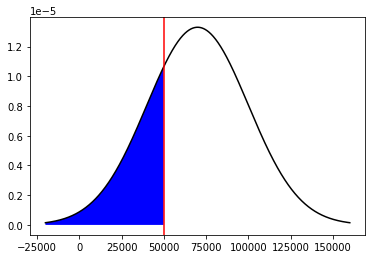

P(X < 50,000 RCU) = 0.252 and so 25.2%


In [132]:
prob=round(stats_norm.cdf(50000), 3)
draw(vlines=[50000], condition=x < 50000, text=f'P(X < 50,000 RCU) = {prob} and so {prob*100}%')

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

Answer:</br>
$X~N(\mu,\sigma), \mu=70k, \sigma=30k$</br>
$P(45k \le X \le 65k) = P(X \le 65k) - P(X \le 44999) = CDF(65k) - CDF(44999) =   = 0.231$</br>

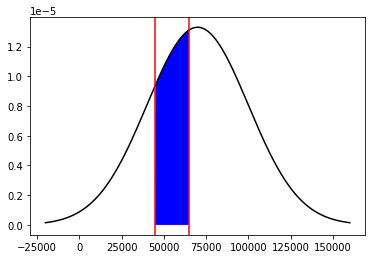

P(65k=>X=>45k)=0.231 and so 23.1%


In [127]:
prob=round(stats_norm.cdf(65000) - stats_norm.cdf(44999),3)
draw(vlines=[45000,65000], condition=(x <= 65000) & (45000 <= x), text=f"P(65k=>X=>45k)={prob} and so {100*prob}%")

#### 4.C
What percent of people earn more than 70,000 RCU?

Answer:</br>
$X~N(\mu,\sigma), \mu=70k, \sigma=30k$</br>
$P(X > 70k) = 1-P(X \le 70k) = 1 - CDF(70k) = 0.5$</br>

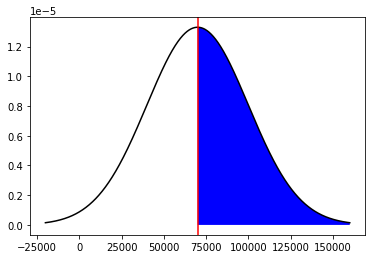

P(X>70k)=0.5, and so 50.0%


In [133]:
prob=round(1-stats_norm.cdf(70000),3)
draw(vlines=[70000], condition=x > 70000, text=f"P(X>70k)={prob}, and so {prob*100}%")

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

Answer:</br>
$X~N(\mu,\sigma), \mu=70k, \sigma=30k$</br>
$P(X > 140k) = 1-P(X \le 140k) = 1 - CDF(140k) = 0.01$</br>

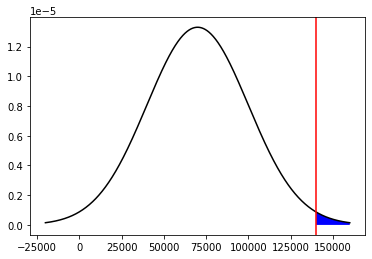

P(X>140k)=0.01, And so I expect that the number of people who earn more than 140k is:10


In [129]:
prob=round(1-stats_norm.cdf(140000),3)
draw(vlines=[140000], condition=x > 140000, text=f"P(X>140k)={prob}, And so I expect that the number of people who earn more than 140k is:{int(prob*1000)}")


#### 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

Answer:
We now define: $Y~Binom(n,p)$</br>
Where n=20, $p_{bucket}=P(70k \ge X \ge 50k) = \text{norm.CDF(70k)}-\text{norm.CDF(49999)}$</br>
We need to find: $P(Y>10)$

In [155]:
buckets = 20
mu = 70000
bucket_sigma = sigma/math.sqrt(buckets)
stats_norm = stats.norm(loc=mu, scale=bucket_sigma)

p = stats_norm.cdf(70000) - stats_norm.cdf(49999)
stats_binom = stats.binom(n=20,p=p)

print(f'P(Y>10)={round(1-stats_binom.cdf(10),3)}')

P(Y>10)=0.407


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

We solved it in 3 different ways:</br>
    1. Empirical</br>
    2. Calc harmonic Sum Series</br>
    3. Sum of Expectations</br>

In [17]:
# simulate coupon collector's problem

import numpy as np


def calc_expectation_tn_empirical_way_single_iteration(n):
    """
    n: number of different coupons (stamps)
    return: days it took to achieve such goal
    """
    days = 0
    collected = set()
    while True:
        # check if we have enough
        if len(collected) == n:
            break
        # we try to collect stamps
        got = np.random.randint(0, n)  # choose a stamp, randomly 1/n
        days += 1
        collected.add(got)

    return days


def calc_expectation_tn_empirical_way(n, number_of_tries=1000):
    assert(number_of_tries > 0)
    return round(sum([calc_expectation_tn_empirical_way_single_iteration(n) for _ in range(1, number_of_tries + 1)])/number_of_tries, 3)



In [3]:
from fractions import Fraction
from scipy.stats import geom


def calc_expectation_tn_harmonic_series_way(n):
    return round(float(n*sum(Fraction(1, p) for p in range(1, n+1))), 3)


def calc_expectation_tn_stats_lib(n):
    return round(sum([geom.stats(p/n, moments='m') for p in range(1, n+1)]), 3)


print(f"harmonic series way for n=100: {calc_expectation_tn_harmonic_series_way(100)}")
print(f"stats lib way for n=100: {calc_expectation_tn_stats_lib(100)}")
print(f"empirical way for n=100: {calc_expectation_tn_empirical_way(100)}")

harmonic series way for n=100: 518.738
stats lib way for n=100: 518.738


/usr/local/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:360: RuntimeWarning: divide by zero encountered in true_divide
  g1 = (2.0-p) / sqrt(qr)
/usr/local/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:361: RuntimeWarning: divide by zero encountered in true_divide
  g2 = np.polyval([1, -6, 6], p)/(1.0-p)


empirical way for n=100: 522.1


#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [4]:
from scipy.stats import geom

def calc_variance_tn_stats_lib(n):
    return round(sum([geom.stats(p/n, moments='v') for p in range(1, n+1)]), 3)

print(f"Variance for n=100: {calc_variance_tn_stats_lib(100)}")


Variance for n=100: 15831.101


#### 5.C
Write code to exactly compute $P(T_{20}>40)$

We will calc $1 - P(T_{20} \le 40)$

Using the convolution formula:

<img src="./Convolution.png">

In [5]:


        
# def prob_tn(K=1, N=20, lookup_table=None, verbose=False):
#     if not lookup_table:
#         lookup_table = dict()
#         lookup_table["1_1"] = 1
#     if f"{N}_{K}" in lookup_table:
#         verbos_print(f"Found {N}_{K}", verbose)
#         return lookup_table[f"{N}_{K}"]
    
#     verbos_print(f"{N}_{K}, {len(lookup_table)}", verbose)
    
    
    
#     if K < N or N == 0:
#         verbos_print(f"{N}_{K}, return 0 (if)", verbose)
#         return 0
#     else:
#         verbos_print("going recursion", verbose)
#         loobup_key = f"{N}_{K}"
#         lookup_table[loobup_key] = sum([geom.pmf(i, 1/N)*prob_tn(K=K-1,N=N-1,lookup_table=lookup_table) for i in range(1, K+1)])
#         verbos_print(f"{loobup_key}, return {lookup_table[loobup_key]} (else)", verbose)
#         return lookup_table[loobup_key]
    
# sum_prob = 0.0
# lookup_table = dict()
# lookup_table["1_1"] = 1
# for i in range(1, 40 + 1):
#     verbos_print(f"----{i}-----", False)
#     sum_prob += prob_tn(K=i,lookup_table=lookup_table)
    
# 1 - sum_prob    


In [6]:
from numpy import convolve


def prob_tn(N=20, K=40):    
    p = (N - np.arange(N)) / N
    
    K_vec = np.arange(K) + 1
    p1 = geom.pmf(K_vec, p[0])

    for current in p[1:]:
        p1 = np.convolve(p1, geom.pmf(K_vec, current))
    
    return round(1 - p1[:K+1-N].sum(), 3)

print(prob_tn(20, 40))


0.964


Using Stirling numbers of the second kind

Based on this stackoverflow answer:
https://math.stackexchange.com/questions/379525/probability-distribution-in-the-coupon-collectors-problem/1454749#1454749

<img src="./SnDA TASHPA Rec2 - Visualization.png">

In [9]:
from math import comb


def prob_tn_stirling(N=20, K=40): 
    n = K
    m = N
    return round(1 - sum([((-1)**(m-j))*comb(m,j)*(j**n) for j in range(0, m+1)])/(m**n), 3)
    
print(prob_tn_stirling(20, 40))

0.964


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

Answer based on this version of chebicheff bound:</br>
<img src="./chebicheff_bound.jpeg"></img>

* $P(T_{20}>40) = P(T_{20} \ge 41)$
* $41 = \mu - b\cdot\sigma \\
\text{ where: } \mu = 71.955, \sigma = 23.8 \Rightarrow b = 1.3 \Rightarrow \mu + b\cdot\sigma = 102.895$
* $P(T_{20} \ge 41) \ge P(102.895 \ge T_{20} \ge 41) \ge 1-\frac{1}{1.3^2} = 0.408$


We got here, using chebicheff, the weak lower bound, for Tn of 20 to be more then 40. which is 0.408. in 5.C we calculated that it's actually 0.964. 
As we can see chebicheff bound holds.

In [16]:
import math 
def chebicheff(N=20,K=40):
    var_Tn = calc_variance_tn_stats_lib(N)
    mean_Tn = calc_expectation_tn_harmonic_series_way(N)
    b = (mean_Tn - (K+1))/math.sqrt(var_Tn)
    print(f"STD: {round(math.sqrt(var_Tn),3)}, Mean:{round(mean_Tn,3)}, b:{round(b,3)}")

    return round(1-1/b**2, 3)

chebicheff(20, 40)

STD: 23.801, Mean:71.955, b:1.301


0.409